# Análisis de Producción de Aceitunas: Variables por Parejas

Este análisis explora relaciones entre variables por parejas, trabajando con datos de producción de aceitunas para identificar patrones y correlaciones. 

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/RafaelCaballero/tdm/refs/heads/master/datos/olivos.csv")

df

,CAMPO,PRODUCCIÓN,AÑO,TEMPERATURA,HUMEDAD,ACEITUNA,ID
0,C1,83.87,22,19.86,65.39,Picual,ID_10
1,C1,86.78,22,22.74,66.18,Picual,ID_07
2,C1,86.05,22,21.17,64.57,Picual,ID_04
3,C1,83.17,22,21.29,60.43,Picual,ID_09
4,C1,86.31,22,20.37,64.62,Picual,ID_10
...,...,...,...,...,...,...,...
925,C4,57.49,24,15.68,65.81,Manzanilla,ID_02
926,C4,86.20,24,20.03,61.72,Picual,ID_05
927,C4,73.70,24,18.59,69.81,Manzanilla,ID_08
928,C4,75.52,24,19.32,63.60,Manzanilla,ID_02


- Cada fila representa una muestra de aceitunas elegida en un campo (columna `CAMPO`). 
- `PRODUCCIÓN`: indica lo productivas que son esas aceitunas para elaborar aceite. 
- `AÑO`: año de la muestra
- `TEMPERATURA`: temperatura en el momento de la recogida
- `HUMEDAD`: humedad en el momento de la recogida
- `ACEITUNA`: variedad de aceituna 
- `ID`: identificador del recolector

In [135]:
def info_df(df):
    return pd.DataFrame({
        'Columna': df.columns,
        'No Nulos': df.notnull().sum().values,
        'Nulos': df.isnull().sum().values,
        'Tipo Python': df.dtypes.values,
        'Núm. valores': [len(df[col].unique()) for col in df.columns]
    })

info_df(df)

,Columna,No Nulos,Nulos,Tipo Python,Núm. valores
0,CAMPO,930,0,object,4
1,PRODUCCIÓN,930,0,float64,724
2,AÑO,930,0,int64,3
3,TEMPERATURA,930,0,float64,689
4,HUMEDAD,930,0,float64,765
5,ACEITUNA,930,0,object,3
6,ID,930,0,object,10


In [136]:
for col in df.columns:
    if len(df[col].unique())<=10:
        print(df[col].value_counts())
        print("="*50)

CAMPO
C1    353
C3    233
C2    182
C4    162
Name: count, dtype: int64
AÑO
24    332
23    310
22    288
Name: count, dtype: int64
ACEITUNA
Picual        409
Hojiblanca    316
Manzanilla    205
Name: count, dtype: int64
ID
ID_02    234
ID_08    152
ID_06    152
ID_09     94
ID_10     70
ID_03     59
ID_05     53
ID_04     49
ID_01     38
ID_07     29
Name: count, dtype: int64


In [137]:
df.describe()

,PRODUCCIÓN,AÑO,TEMPERATURA,HUMEDAD
count,930.000000,930.000000,930.000000,930.000000
mean,81.075075,23.047312,16.921258,68.081161
std,7.861237,0.815563,5.514560,6.285863
min,37.240000,22.000000,2.600000,56.170000
25%,76.000000,22.000000,12.935000,63.330000
50%,81.290000,23.000000,19.185000,66.925000
75%,86.292500,24.000000,21.197500,72.510000
max,98.140000,24.000000,24.580000,86.390000


**Análisis 1** Indicar el tipo de cada variable, a elegir entre: categórico, ordinal, intervalo, ratio. Decir además si es continua o discreta. Hacerlo editando la siguiente casilla de texto:

Solución:

- `CAMPO`: Categórico
- `PRODUCCIÓN`: ratio
- `AÑO`: ordinal 
- `TEMPERATURA`: intervalo 
- `HUMEDAD`: ratio
- `ACEITUNA`: categorico
- `ID`: categorico - (ordinal -> también podria ser)

**Análisis 2** Para cada una de las variables por separado hacer uno, a lo sumo dos gráficos para entender mejor los datos (no hacer gráficos que combinen dos o más variables, eso lo haremos después)

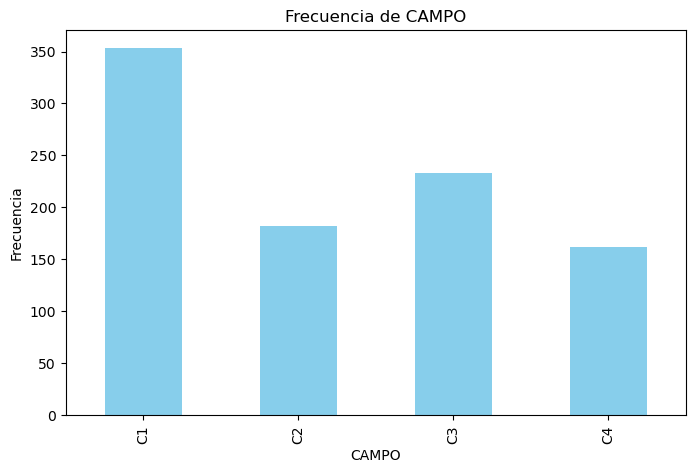

In [138]:
### CAMPO

#diagrama de barra

def barras(df,columna):
  frecuencias = df[columna].value_counts().sort_index()

  # Crear un diagrama de barras usando pandas
  frecuencias.plot(kind='bar', figsize=(8, 5), color='skyblue', title=f'Frecuencia de {columna}')
  plt.xlabel(columna)
  plt.ylabel('Frecuencia')
  plt.show()
      

barras(df,"CAMPO")   
    
    

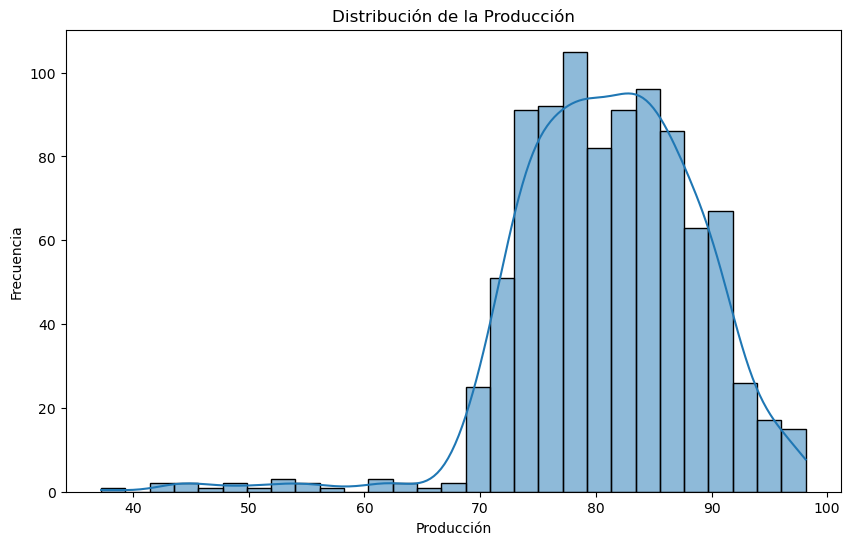

In [139]:
### PRODUCCIÓN
# Histograma con KDE para variable continua
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='PRODUCCIÓN', kde=True)
plt.title('Distribución de la Producción')
plt.xlabel('Producción')
plt.ylabel('Frecuencia')
plt.show()



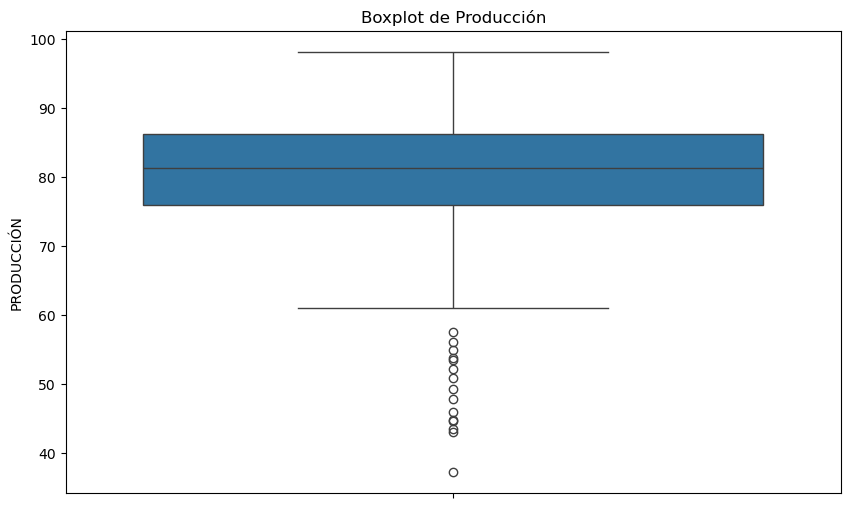

In [140]:
# Boxplot para ver la distribución y outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='PRODUCCIÓN')
plt.title('Boxplot de Producción')
plt.show()

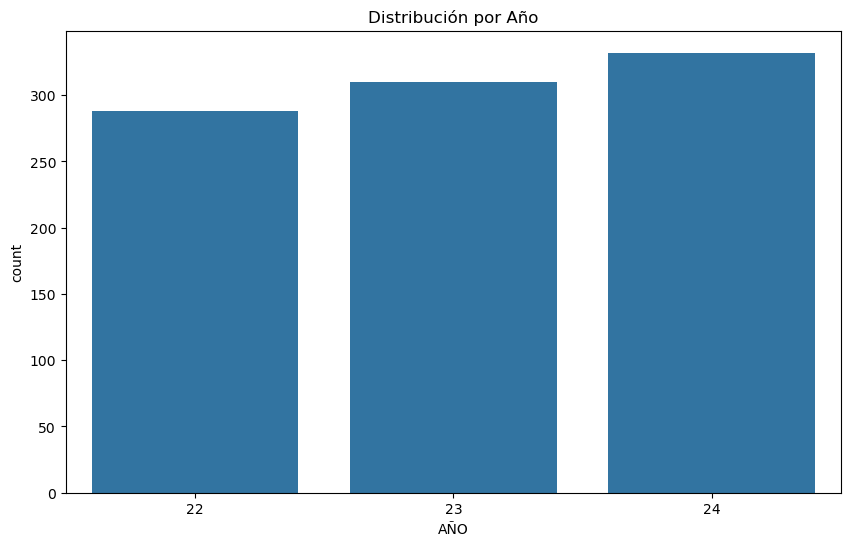

In [141]:
### AÑO
# Countplot para variable ordinal con pocos valores
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AÑO')
plt.title('Distribución por Año')
plt.show()

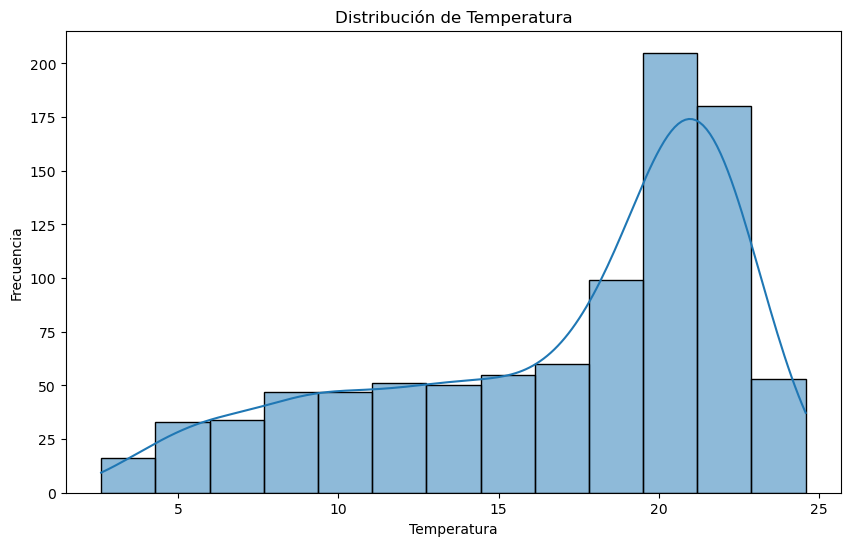

In [142]:
### TEMPERATURA
# Histograma con KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TEMPERATURA', kde=True)
plt.title('Distribución de Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.show()


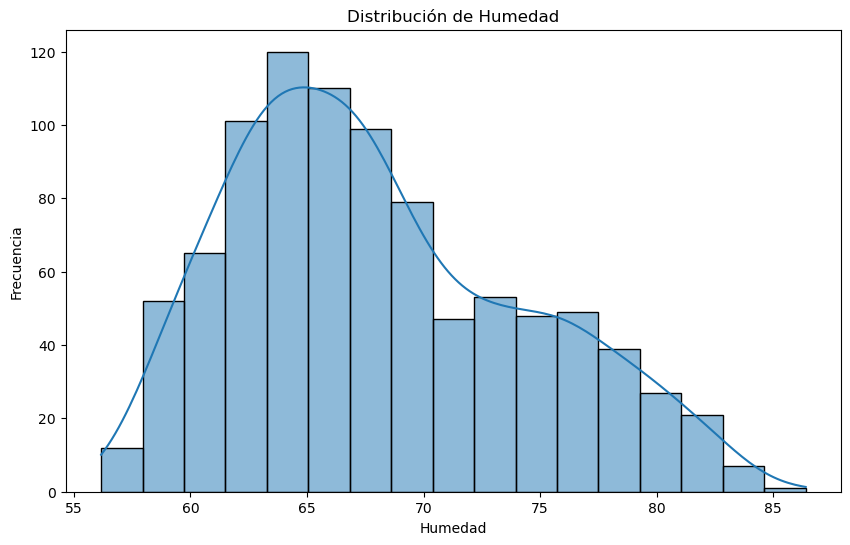

In [143]:
### HUMEDAD
# Histograma con KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='HUMEDAD', kde=True)
plt.title('Distribución de Humedad')
plt.xlabel('Humedad')
plt.ylabel('Frecuencia')
plt.show()


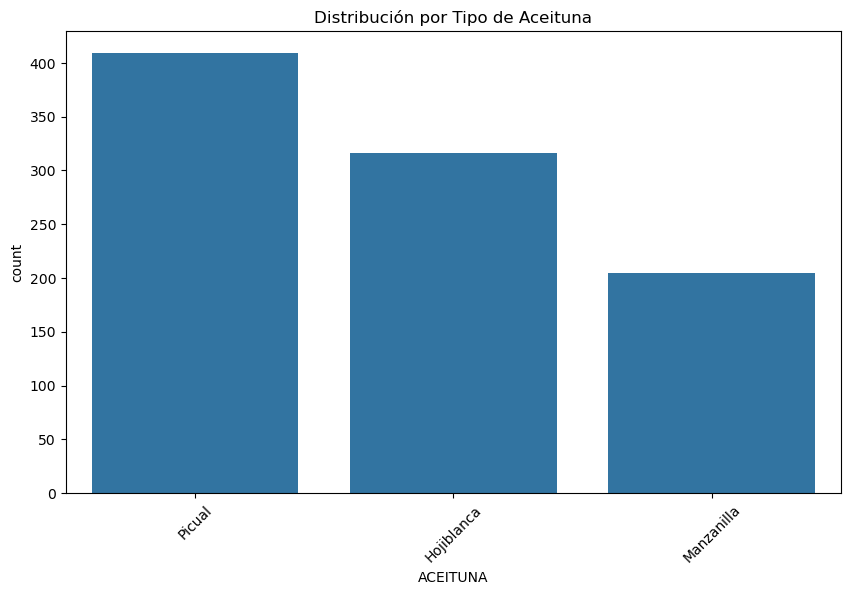

In [144]:
### ACEITUNA
# Countplot para variable categórica
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ACEITUNA')
plt.title('Distribución por Tipo de Aceituna')
plt.xticks(rotation=45)
plt.show()

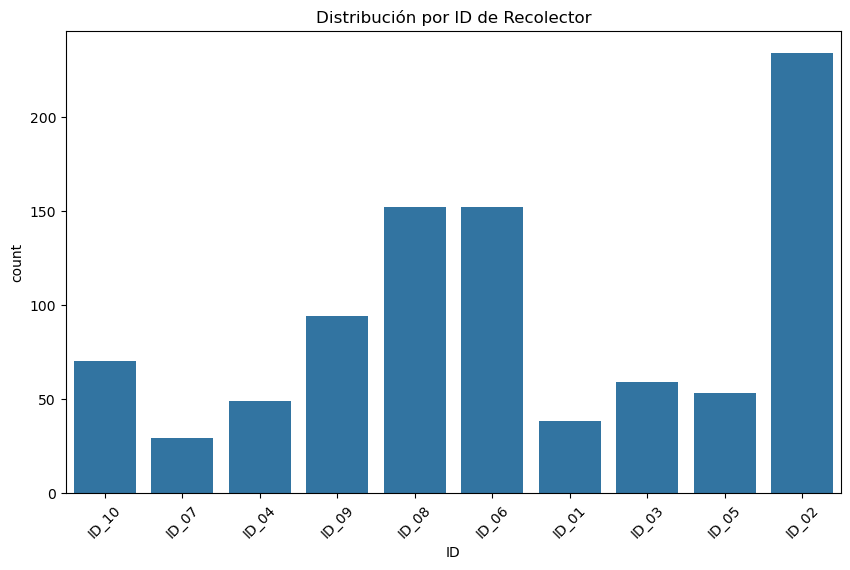

In [145]:
# ID
# Countplot para variable categórica
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ID')
plt.title('Distribución por ID de Recolector')
plt.xticks(rotation=45)
plt.show()

**Análisis 3**  Queremos hacer un _heatmap_ que muiestre el número de recolecciones de cada recolector (`ID`) en cada `CAMPO`

In [146]:
## Solución
# Crear tabla de contingencia entre ID y CAMPO
correlaciones = pd.crosstab(
    df['ID'],
    df['CAMPO'] 
)
correlaciones

CAMPO,C1,C2,C3,C4
ID,,,,
ID_01,27,4,4,3
ID_02,12,107,14,101
ID_03,25,12,20,2
ID_04,26,7,12,4
ID_05,22,5,17,9
ID_06,125,7,7,13
ID_07,9,8,7,5
ID_08,43,10,91,8
ID_09,32,17,34,11


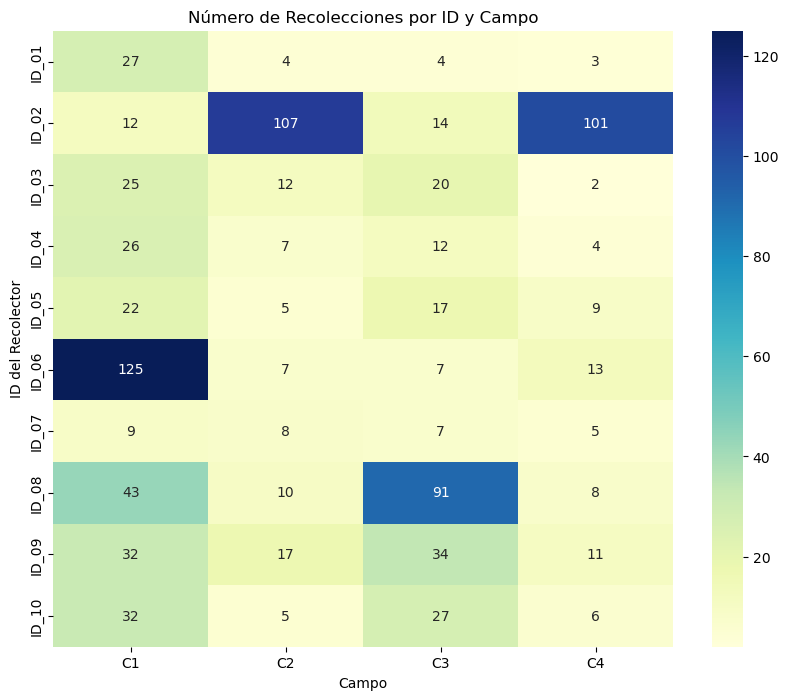

In [147]:
# Crear heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, fmt="d", cmap="YlGnBu")

# Añadir título y etiquetas
plt.title('Número de Recolecciones por ID y Campo')
plt.ylabel('ID del Recolector')
plt.xlabel('Campo')
plt.show()

**Análisis 4** En `df`queremos hacer un diagrama de violín que muestre 

a) 
- En la x el CAMPO
- En la y la producción
- Además distinguir por AÑO (parámetro `hue`)

- En la x el CAMPO
- En la y la producción
- Además distinguir por ACEITUNA (parámetro `hue`)

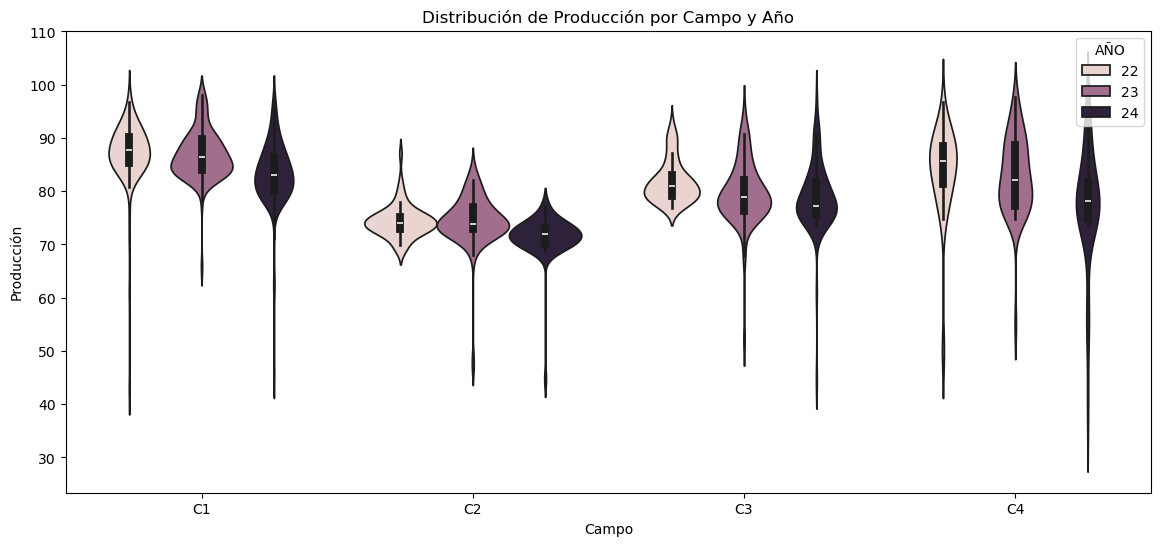

In [148]:
### a) solución
import seaborn as sns
import matplotlib.pyplot as plt


fig, eje = plt.subplots(figsize=(14, 6))
sns.violinplot(data=df, x="CAMPO", y="PRODUCCIÓN", hue="AÑO", )
plt.title('Distribución de Producción por Campo y Año')
plt.xlabel('Campo')
plt.ylabel('Producción')
plt.show()

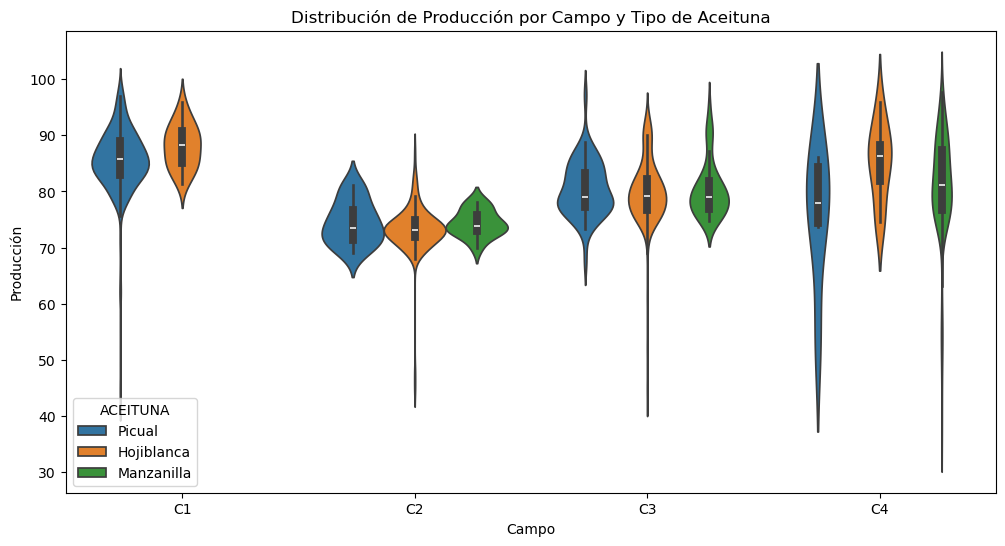

In [149]:
### b) (por aceituna)
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='CAMPO', y='PRODUCCIÓN', hue='ACEITUNA')
plt.title('Distribución de Producción por Campo y Tipo de Aceituna')
plt.xlabel('Campo')
plt.ylabel('Producción')
plt.show()

**Análisis 5**

Quremos hacer un diagrama de enjambre representando en $x$ el `AÑO` , en $y$ la `PRODUCCIÓN` y como _hue_ la `ACEITUNA` (no preocuparse de los numerosos warning)

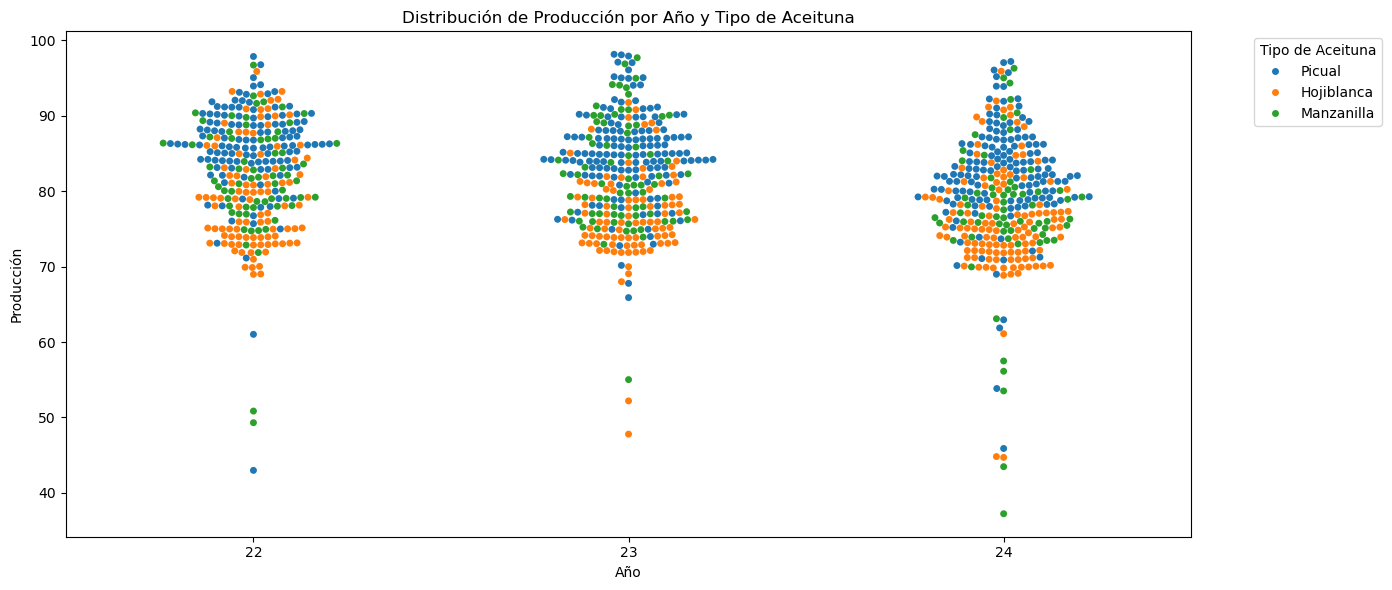

In [150]:
import seaborn as sns
fig, eje = plt.subplots(figsize=(14, 6))

## solución

# Crear el diagrama de enjambre
sns.swarmplot(data=df, x='AÑO', y='PRODUCCIÓN', hue='ACEITUNA', ax=eje)

# Personalizar el gráfico
plt.title('Distribución de Producción por Año y Tipo de Aceituna')
plt.xlabel('Año')
plt.ylabel('Producción')

# Ajustar la leyenda
plt.legend(title='Tipo de Aceituna', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar los márgenes para que se vea bien la leyenda
plt.tight_layout()

plt.show()

**Análisis 6** Consideramos ahora solo el campo "C1". Queremos calcular la media de `PRODUCCIÓN` para cada uno de los 3 años, 22,23 y 24 con un intervalo de confianza:

- Generar un dataframe df22 con los datos de CAMPO C1 y AÑO 22, otro df23 con los datos de CAMPO C1 y AÑO 23 y otro df24 con los datos de CAMPO C1 y AÑO 24

- En cada caso calcular la media con intervalo de confianza utilizando boostrap por medio de la librería scipy

- ¿Hay algún año en el que podamos asegurar que la media de la media de la producción es estadísticamente diferente a alguno de los otros años?

In [151]:
import pandas as pd
from scipy.stats import bootstrap

# solución 
# Filtrar datos para campo C1 por cada año
df22 = df.loc[
    (df["CAMPO"] == "C1") & (df["AÑO"] == 22)
]["PRODUCCIÓN"]
df22

df23 = df.loc[
    (df["CAMPO"] == "C1") & (df["AÑO"] == 23)
]["PRODUCCIÓN"]
df23

df24 = df.loc[
    (df["CAMPO"] == "C1") & (df["AÑO"] == 24)
]["PRODUCCIÓN"]
df24

# Función para calcular la media
def calcular_media(data):
    return np.mean(data)

#calcular la media con intervalo de confianza utilizando boostrap por medio de la librería scipy
# Calcular bootstrap para cada año

#22
b_df22 = bootstrap((df22,), calcular_media, n_resamples=10000, confidence_level=0.95)
#b_df22.confidence_interval

print("Año 2022:")
print(f"Media: {np.mean(df22):.2f}")
print(f"Intervalo de confianza: [{b_df22.confidence_interval.low:.2f}, {b_df22.confidence_interval.high:.2f}]")

#23
b_df23 = bootstrap((df23,), calcular_media, n_resamples=10000, confidence_level=0.95)
print("Año 2023:")
print(f"Media: {np.mean(df23):.2f}")
print(f"Intervalo de confianza: [{b_df23.confidence_interval.low:.2f}, {b_df23.confidence_interval.high:.2f}]")

#24
b_df24 = bootstrap((df24,), calcular_media, n_resamples=10000, confidence_level=0.95)
print("Año 2024:")
print(f"Media: {np.mean(df24):.2f}")
print(f"Intervalo de confianza: [{b_df24.confidence_interval.low:.2f}, {b_df24.confidence_interval.high:.2f}]")

Año 2022:
Media: 87.15
Intervalo de confianza: [85.53, 88.05]
Año 2023:
Media: 86.92
Intervalo de confianza: [86.08, 87.77]
Año 2024:
Media: 83.28
Intervalo de confianza: [82.07, 84.25]


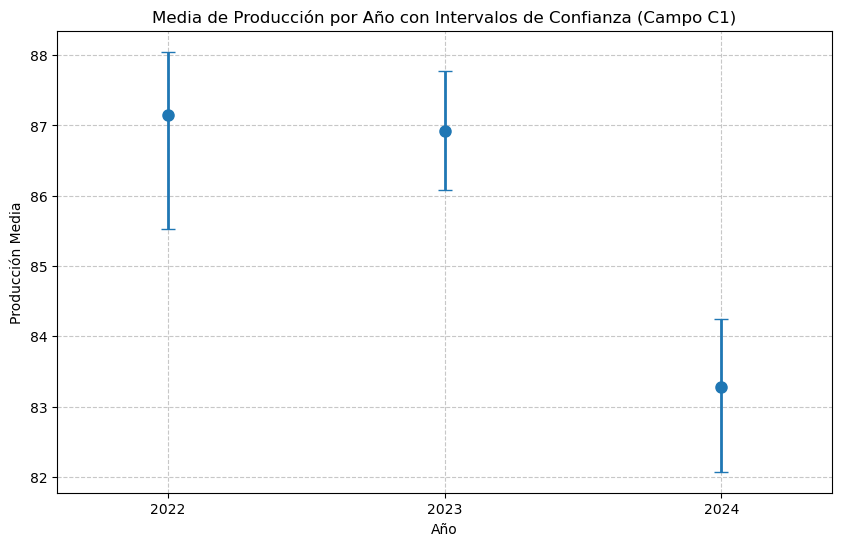

In [152]:
# Visualización mejorada de los intervalos
plt.figure(figsize=(10, 6))
años = ['2022', '2023', '2024']  # Cambiado a strings para mejor visualización
medias = [np.mean(df22), np.mean(df23), np.mean(df24)]
intervalos_inf = [b_df22.confidence_interval.low, b_df23.confidence_interval.low, b_df24.confidence_interval.low]
intervalos_sup = [b_df22.confidence_interval.high, b_df23.confidence_interval.high, b_df24.confidence_interval.high]

plt.errorbar(años, medias, yerr=[np.array(medias) - np.array(intervalos_inf), 
                                np.array(intervalos_sup) - np.array(medias)], 
             fmt='o', capsize=5, markersize=8, elinewidth=2)

plt.title('Media de Producción por Año con Intervalos de Confianza (Campo C1)')
plt.xlabel('Año')
plt.ylabel('Producción Media')
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar los límites del eje Y para mejor visualización
plt.margins(x=0.2)

plt.show()

¿Qué podemos decir? ¿Hay algún año diferente con significación estadística?

Creo que esta es la interpretación (espero estar analizándolo bien):

Basándome en el análisis de bootstrap con intervalos de confianza al 95%, puedo concluir que:

1. El año 2024 muestra una diferencia estadísticamente significativa en su media de producción cuando se compara con:
   - El año 2022 (hay diferencia significativa)
   - El año 2023 (hay diferencia significativa)

2. Sin embargo, entre los años 2022 y 2023 no encontré diferencias estadísticamente significativas.

Esta conclusión se fundamenta en:
- El no solapamiento de los intervalos de confianza entre 2024 y los otros años
- El solapamiento de los intervalos de confianza entre 2022 y 2023

Por lo tanto, puedo afirmar que la producción en el campo C1 durante el año 2024 fue significativamente diferente a los años anteriores.


**Análisis 7** Queremos saber si los diferentes campos guardan algún tipo de correlación con el ID del recolector. Al ser ambas variables de tipo categórico, emplearemos un test de la $\chi^2$. Para eso debemos hacer una tabla de contingencias que tenga como índice el `ID` y como columnas el `CAMPO`

In [153]:
from scipy.stats import chi2_contingency

# solución

# Crear tabla de contingencias
contingencias = pd.crosstab(df['ID'], df['CAMPO'])
#contingencias

# Realizar test chi-cuadrado
chi2, p_valor, grados_libertad, valores_esperados = chi2_contingency(contingencias)


#es copn el test de chi2
#se va a rechazar la hipotesis nula
#probar con dos columnas hay correlacion
#con los inspectores

In [154]:
# Mostrar resultados
print("\nResultados del test chi-cuadrado:")
print(f"Estadístico chi-cuadrado: {chi2:.2f}")
print(f"p-valor: {p_valor:.10f}")
print(f"Grados de libertad: {grados_libertad}")
#print(f"Valores esperados: {valores_esperados}")


Resultados del test chi-cuadrado:
Estadístico chi-cuadrado: 562.39
p-valor: 0.0000000000
Grados de libertad: 27


-Hay rechazo de la hipótesis nula por independencia entre las variables
-Hay una correlación estadísticamente "significativa" entre el "CAMPO" y el "ID" del recolector
-Esta correlación es muy fuerte, dado el "p-valor" muy bajo
-Esto sugiere que posiblemente los recolectores no se asignan aleatoriamente a los campos, sino que existe un patrón en la asignación de recolectores a campos específicos

**Análisis 8** El test nos dice que hay correlación, pero no entre qué columnas, probar de dos en dos columnas filtrando el dataframe de contingencias (C1 con C2, luego C1 con C3, etc) mostrando en cada caso los nombres de las columnas si la p del test. ¿Qué consecuencias se obtiene?

In [155]:

# solución

# Lista de todas las combinaciones posibles de campos
campos = ['C1', 'C2', 'C3', 'C4']
combinaciones = []
for i in range(len(campos)):
    for j in range(i+1, len(campos)):
        combinaciones.append((campos[i], campos[j]))

# Probar cada par de campos
print("Análisis por pares de campos:")
for campo1, campo2 in combinaciones:
   
    # Filtrar la tabla de contingencias para los dos campos
    tabla_filtrada = contingencias[[campo1, campo2]]
    
    # Realizar test chi-cuadrado
    chi2, p_valor, gl, _ = chi2_contingency(tabla_filtrada)
    
    print(f"\n{campo1} vs {campo2}:")
    print(f"Chi-cuadrado: {chi2:.2f}")
    print(f"p-valor: {p_valor:.10f}")
    if p_valor < 0.05:
        print("Hay correlación significativa")
    else:
        print("No hay correlación significativa")

Análisis por pares de campos:

C1 vs C2:
Chi-cuadrado: 239.29
p-valor: 0.0000000000
Hay correlación significativa

C1 vs C3:
Chi-cuadrado: 127.77
p-valor: 0.0000000000
Hay correlación significativa

C1 vs C4:
Chi-cuadrado: 236.24
p-valor: 0.0000000000
Hay correlación significativa

C2 vs C3:
Chi-cuadrado: 163.36
p-valor: 0.0000000000
Hay correlación significativa

C2 vs C4:
Chi-cuadrado: 12.39
p-valor: 0.1922011693
No hay correlación significativa

C3 vs C4:
Chi-cuadrado: 176.94
p-valor: 0.0000000000
Hay correlación significativa


1. La mayoría de los pares muestran correlación significativa (p-valor < 0.05):
   - C1 vs C2 (chi2: 239.29, p: ≈0)
   - C1 vs C3 (chi2: 127.77, p: ≈0)
   - C1 vs C4 (chi2: 236.24, p: ≈0)
   - C2 vs C3 (chi2: 163.36, p: ≈0)
   - C3 vs C4 (chi2: 176.94, p: ≈0)

2. Solo un par NO muestra correlación significativa:
   - C2 vs C4 (chi2: 12.39, p: 0.1922)
   
Consecuencias:
1. La distribución de recolectores es significativamente diferente entre casi todos los campos
2. Solo entre C2 y C4 la distribución de recolectores es similar (no hay diferencia significativa)
3. El campo C1 muestra las diferencias más fuertes con otros campos (valores chi2 más altos)
4. Esto sugiere que existe un patrón sistemático en la asignación de recolectores, excepto entre C2 y C4

Interesante que esto da una visión más matizada y precisa de la correlación general que se encontró en el análisis 7.

**Análisis 9** Vemos ahora correlaciones numéricas. Vamos a no considerar el ID (supongamos que no interesa). Hacer inicialmente el diagrama de correlaciones de solo los datos numéricos. Utilizar el _clustermap_



Text(0.5, 1.02, 'Clustermap de Correlaciones - Variables Numéricas')

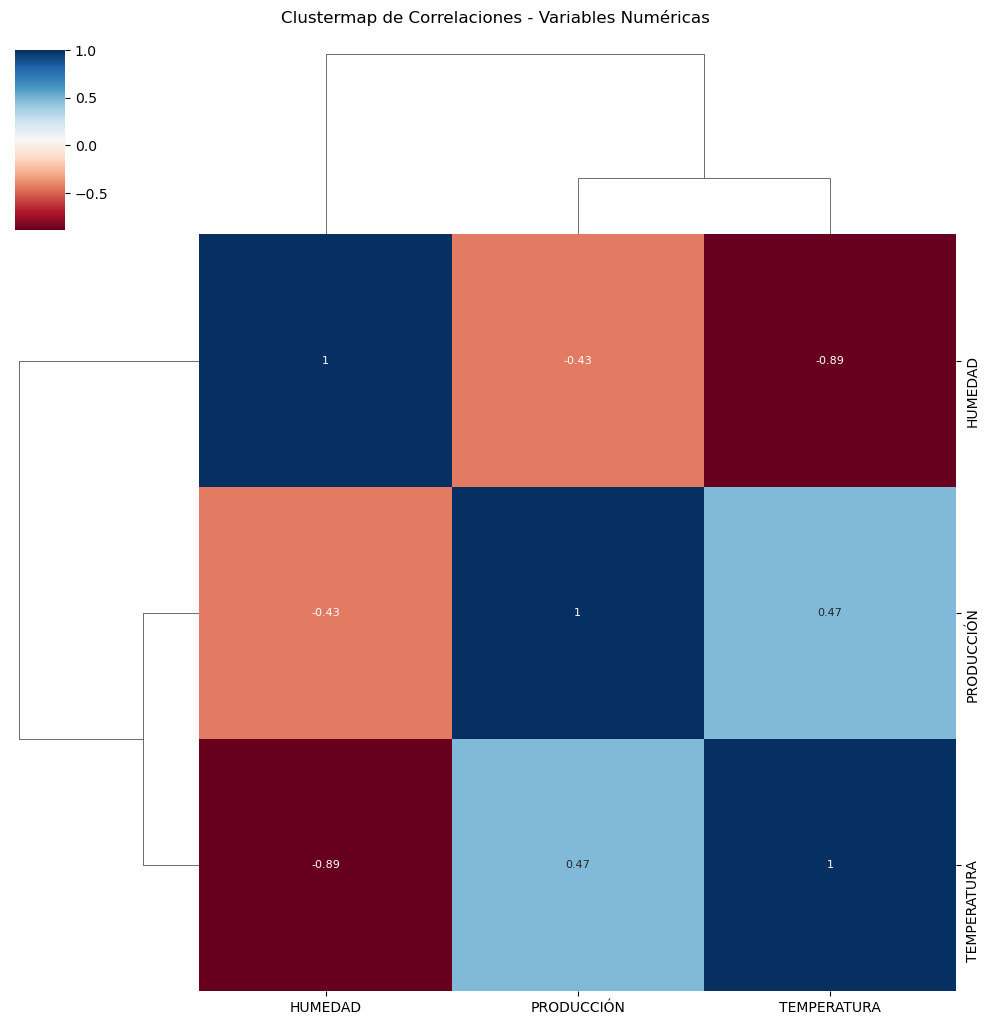

In [156]:
columnas = ['PRODUCCIÓN',  'TEMPERATURA', 'HUMEDAD']
import seaborn as sns
import matplotlib.pyplot as plt


# solución

# Crear matriz de correlación
corr_matrix = df[columnas].corr()

# Crear clustermap
g = sns.clustermap(corr_matrix, 
                    method = 'complete',
                   cmap   = 'RdBu',
                   annot  = True,
                   annot_kws = {'size': 8})

# Ajustar el título
g.fig.suptitle('Clustermap de Correlaciones - Variables Numéricas', y=1.02)

#Intenté hacerlo con .T.corr() pero no me salió, se quedaba en un loop infinito
#Entendería que en este caso no afectaría para el análisis buscado.

¿Qué conclusiones sacas?

#Debo confesar que me cuesta entender este tipo de gráfico, me imagino que con la práctica se irá ejercitando el musculo cerebral encargado de este tipo de análisis... je je.... Acá vamos...

1. La correlación más fuerte se observa entre:
   - PRODUCCIÓN y TEMPERATURA (positiva)
   - Esto indica que la temperatura es el factor más influyente en la producción

2. La HUMEDAD muestra:
   - Correlación negativa con ambas variables
   - Se agrupa separadamente en el cluster
   - Tiene menor influencia en la producción

Por lo tanto, la temperatura parece ser el factor ambiental más determinante 
en la producción mientras que la humedad tiene un impacto menor.


**Análisis 10** Ahora vamos a incorporar las variables categóricas (con excepción del ID, que nos interesa). Para eso las convertimos a numéricas. 


In [158]:
columnas = [c for c in df.columns if c!="ID" and c!="AÑO"]
print(columnas)

df2 = df[columnas].copy()

['CAMPO', 'PRODUCCIÓN', 'TEMPERATURA', 'HUMEDAD', 'ACEITUNA']


a) Escribir código para en df2 reemplazar los valores de las columnas `ACEITUNA` y `CAMPO` por números consecutivos (se puede hacer "a mano" o con algún método mejor, según se prefiera). 

Hacer a continuación el diagrama de correlación con cluster de `df2`y obtener consecuencias del resultado

Text(0.5, 1.02, 'Clustermap de Correlaciones - Variables Convertidas')

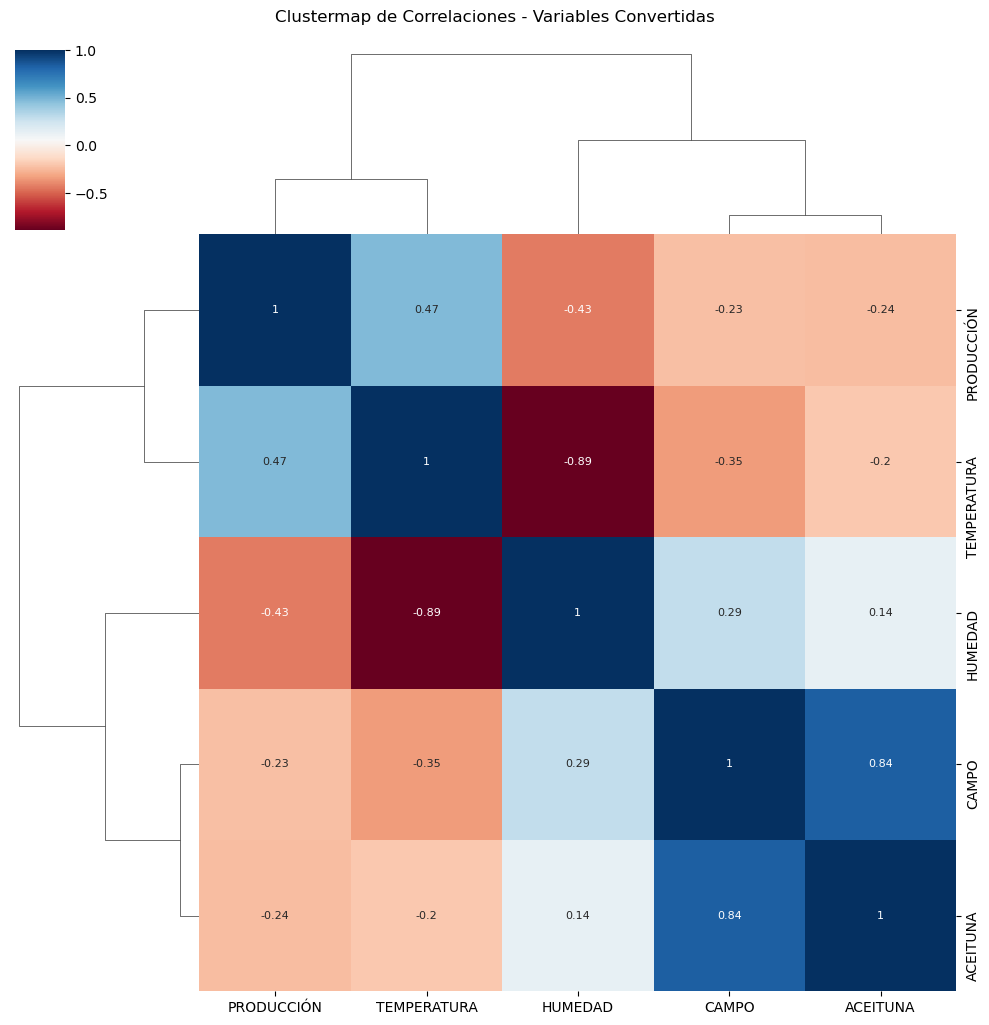

In [159]:

# solución
#convertir a mano c1 1 y c2 a la mala
df2['CAMPO'] = df2['CAMPO'].map({'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4})
df2['ACEITUNA'] = df2['ACEITUNA'].map({'Picual': 1, 'Manzanilla': 2})

# Crear diagrama de correlación con cluster
g = sns.clustermap(df2.corr(), 
                   method='complete',
                   cmap='RdBu',
                   annot=True,
                   annot_kws={'size': 8})

g.fig.suptitle('Clustermap de Correlaciones - Variables Convertidas', y=1.02)




b) El método anterior no es el recomendado. En su lugar, deberíamos utilizar el método `get_dummies` que convierte cada columna en varias

In [160]:
df2 = pd.get_dummies(df[columnas])
df2



,PRODUCCIÓN,TEMPERATURA,HUMEDAD,CAMPO_C1,CAMPO_C2,CAMPO_C3,CAMPO_C4,ACEITUNA_Hojiblanca,ACEITUNA_Manzanilla,ACEITUNA_Picual
0,83.87,19.86,65.39,True,False,False,False,False,False,True
1,86.78,22.74,66.18,True,False,False,False,False,False,True
2,86.05,21.17,64.57,True,False,False,False,False,False,True
3,83.17,21.29,60.43,True,False,False,False,False,False,True
4,86.31,20.37,64.62,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
925,57.49,15.68,65.81,False,False,False,True,False,True,False
926,86.20,20.03,61.72,False,False,False,True,False,False,True
927,73.70,18.59,69.81,False,False,False,True,False,True,False
928,75.52,19.32,63.60,False,False,False,True,False,True,False


Añadir código para repetir el diagrama de correlaciones sobre `df2` y sacar conclusiones ¿cuál es más informativo y por qué?

Text(0.5, 1.02, 'Clustermap de Correlaciones - Variables Dummy')

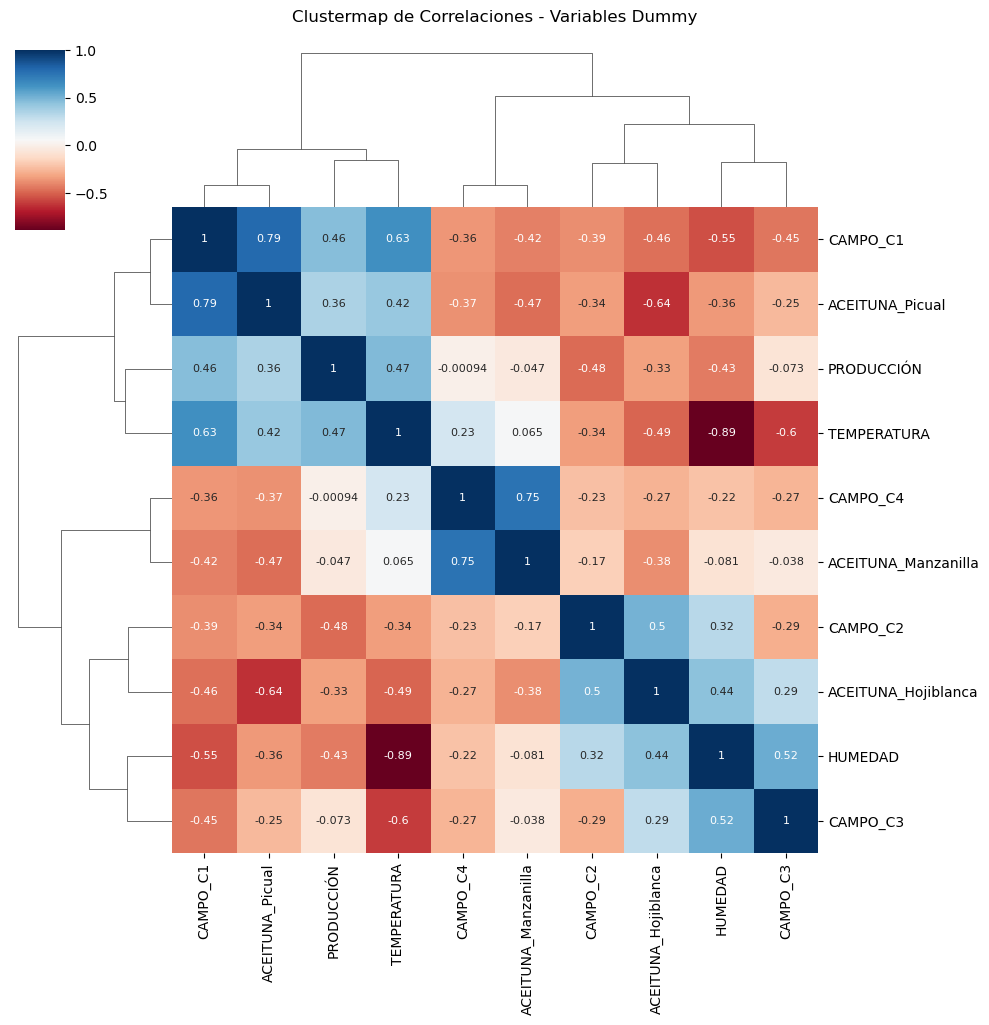

In [161]:
#Crear diagrama de correlación con cluster
g = sns.clustermap(df2.corr(), 
                   method='complete',
                   cmap='RdBu',
                   annot=True,
                   annot_kws={'size': 8})

g.fig.suptitle('Clustermap de Correlaciones - Variables Dummy', y=1.02)


1. Método 10.a (números consecutivos):
   Ventajas que observo:
   + Simple de implementar
   + Mantiene una única columna por variable
   Desventajas que identifico:
   - Introduce orden artificial
   - Asume distancias iguales entre categorías
   - Las correlaciones no reflejan la realidad categórica

2. Método 10.b (get_dummies):
   Ventajas que observo:
   + Cada categoría se trata independientemente
   + No asume orden entre categorías
   + Muestra correlaciones reales con cada categoría
   Desventajas que identifico:
   - Matriz de correlaciones más compleja
   - Puede ser más difícil de interpretar visualmente

Conclusiones:


Considero que el método 10.b es más informativo porque:
1. Respeta la naturaleza categórica de las variables
2. Me permite ver correlaciones específicas para cada categoría
3. No introduce relaciones artificiales
4. Las correlaciones resultantes representan mejor la realidad de los datos